In [ ]:
#UNSUPERVISED CLASSIFICATION

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'subset_0_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds = xr.open_dataset(PATH+FILENAME)  # loading dataset

In [3]:
ds

<xarray.Dataset>
Dimensions:                       (lat: 962, lon: 2733)
Coordinates:
  * lat                           (lat) float64 51.0 51.0 51.0 ... 50.83 50.83
  * lon                           (lon) float64 14.15 14.15 14.15 ... 14.4 14.4
Data variables: (12/47)
    B1                            (lat, lon) float32 ...
    B2                            (lat, lon) float32 ...
    B3                            (lat, lon) float32 ...
    B4                            (lat, lon) float32 ...
    B5                            (lat, lon) float32 ...
    B6                            (lat, lon) float32 ...
    ...                            ...
    view_zenith_B10               (lat, lon) float32 ...
    view_azimuth_B10              (lat, lon) float32 ...
    view_zenith_B11               (lat, lon) float32 ...
    view_azimuth_B11              (lat, lon) float32 ...
    view_zenith_B12               (lat, lon) float32 ...
    view_azimuth_B12              (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [4]:
#First, we reduce our dataset so that just the spectral bands are used for our analysis.

ds_reduced = ds[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
ds_reduced

<xarray.Dataset>
Dimensions:  (lat: 962, lon: 2733)
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables:
    B1       (lat, lon) float32 ...
    B2       (lat, lon) float32 ...
    B3       (lat, lon) float32 ...
    B4       (lat, lon) float32 ...
    B5       (lat, lon) float32 ...
    B6       (lat, lon) float32 ...
    B7       (lat, lon) float32 ...
    B8       (lat, lon) float32 ...
    B8A      (lat, lon) float32 ...
    B9       (lat, lon) float32 ...
    B11      (lat, lon) float32 ...
    B12      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [5]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df = ds_reduced.to_dataframe()  # converting to pandas dataframe
df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12
lat       lon                                                         
51.002887 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...
50.827062 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN

[2629146 rows x 12 columns]

In [6]:
#NANs

df.isnull().values.any()  # check if there are any NaNs
df.isnull().sum().sum()  # counting the NaNs in the whole dataframe, sum across columns and rows

535620

In [7]:
#deleting NANs

df = ds_reduced.to_dataframe().dropna(how='any')
df.isnull().sum().sum()

0

In [8]:
#kmeans clustering

n_clusters = 20 #number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # init k-means model 
kmeans.fit_predict(df) # apply k-means to data 
print(kmeans.labels_)   # show the cluster number for each data point 

[2 2 2 ... 2 2 2]


In [9]:
#Copy the dataframe to a new dataframe and add the cluster label for each pixel.

df_cluster = df
df_cluster['KMeanCluster'] = kmeans.labels_  # adding the labels to our dataset
df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12  KMeanCluster  
lat       lon                                                              
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345             2  
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367             2  
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367             2  
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367             2  
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416             2  
...                     ...     ...     ...     ...     ...           ...  
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362            19  
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362             2  
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362             2  
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273             2  
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273             2  

[2584511 rows x 13 columns]

In [10]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:       (lat: 954, lon: 2733)
Coordinates:
  * lat           (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon           (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/13)
    B1            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B2            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B3            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B4            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B5            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B6            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    B8            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B8A           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B9            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B11           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B12           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    KMeanCluster  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [11]:
SAVING_FILENAME = "kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

In [26]:
#Defines a function to plot the clustering result as a thematic map

def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL'):  # modifying plotting function to achieve a discrete colorbar
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,10), dpi=100)
    ax.imshow(ds[variable],cmap=cmap, aspect='auto')
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters), fraction=0.042, pad=0.02)

    cbar.set_label('cluster')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    plt.tight_layout()
    plt.title(title, fontsize=22)
    
    plt.savefig('D:\\E4\\kmeans_clustering_april.png')

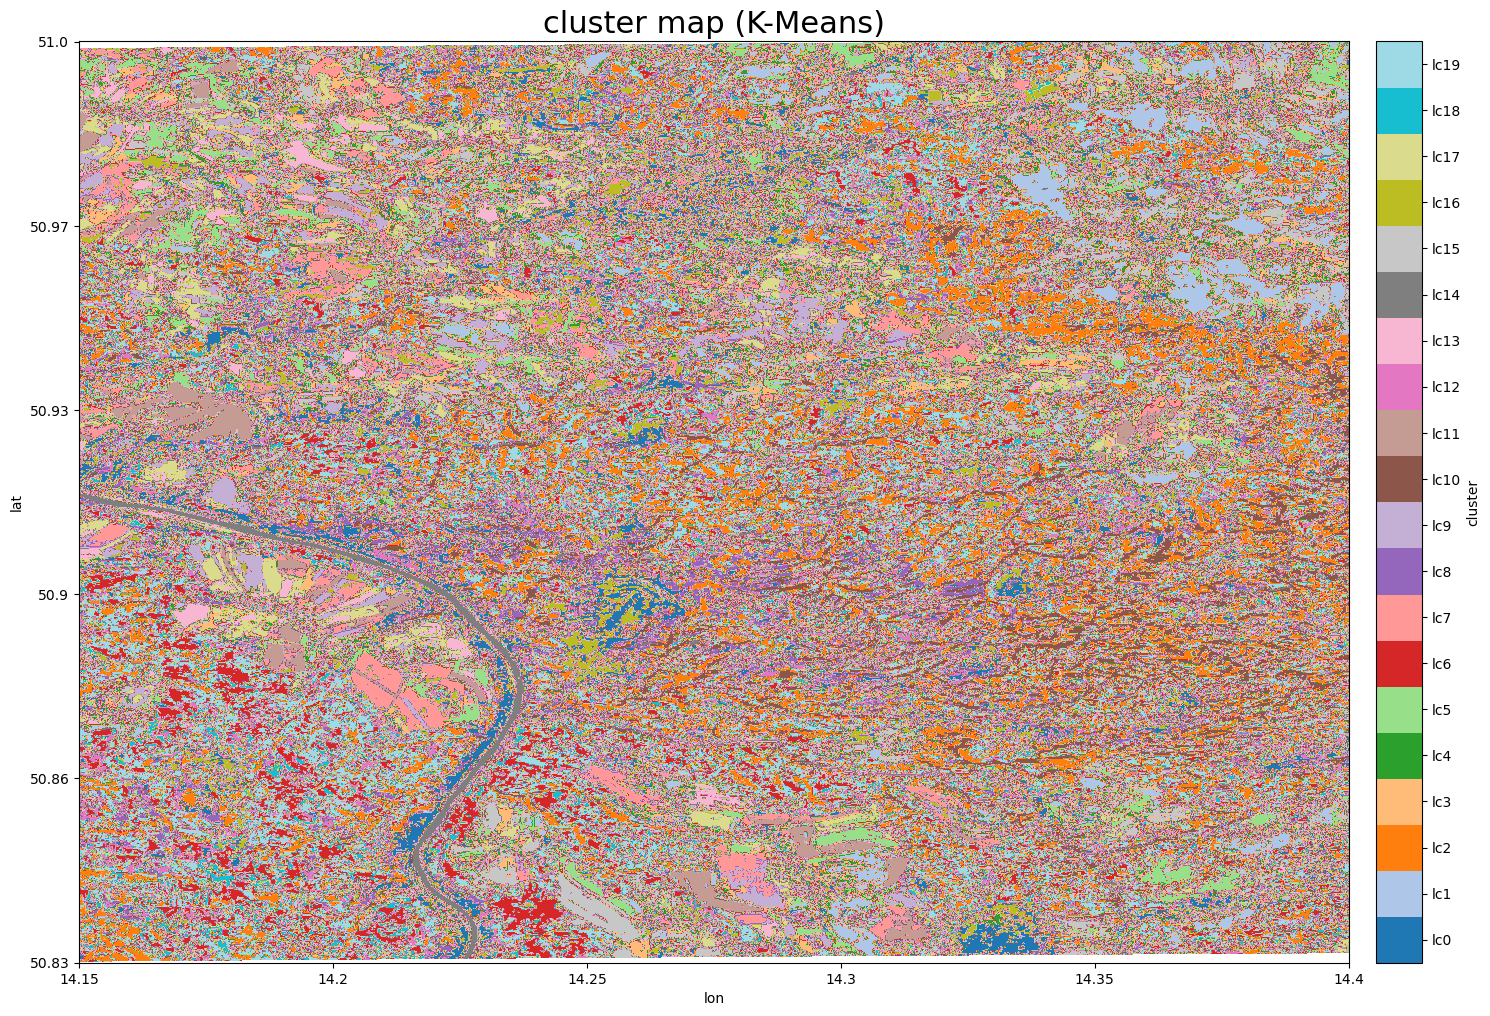

In [27]:
cmap = plt.cm.get_cmap('tab20', n_clusters)  # create colormap
legend_labels = ['lc0', 'lc1', 'lc2', 'lc3', 'lc4', 'lc5', 'lc6', 'lc7', 'lc8', 'lc9','lc10', 'lc11', 'lc12', 'lc13', 'lc14', 'lc15', 'lc16', 'lc17', 'lc18', 'lc19']  # define legend labels
title = 'cluster map (K-Means)'  # set figure title

plotting_lc(ds_cluster, variable='KMeanCluster', n_clusters=n_clusters, cmap=cmap, legend_labels=legend_labels,
            title=title)

In [14]:
#AUSWERTUNG

#Felder - Ic3, Ic5, Ic7, Ic9, Ic11, Ic13, Ic15 
#Wald -  Ic1, Ic2, Ic6
#Wasser - Ic14
#Borkenkäfer - Ic10
#Boden - Ic0, Ic16
#NaN - Ic4, Ic8, Ic12, Ic17, Ic18, Ic19
#
#

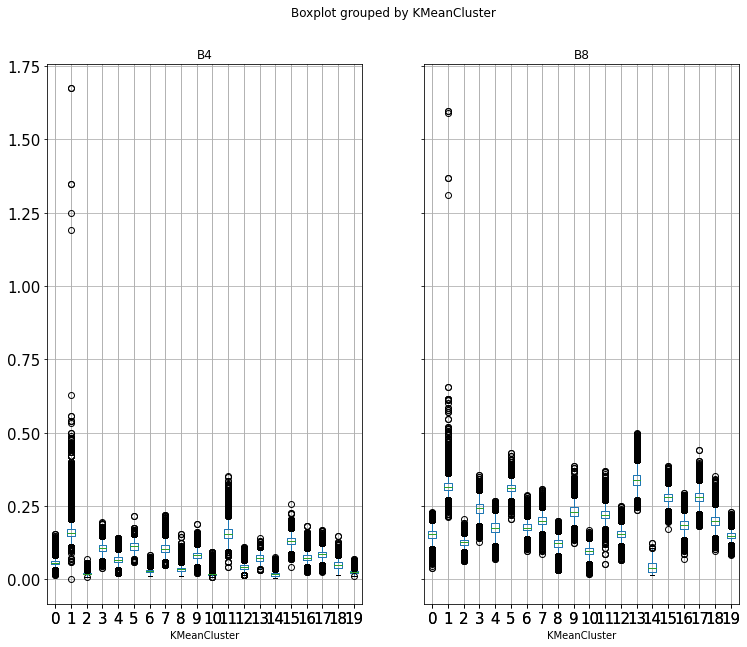

In [15]:
#You can also plot a boxplot to look at the distribution of reflectances in each cluster.

boxplot = df_cluster.boxplot(column=['B4', 'B8'], by='KMeanCluster', figsize=(12,10), fontsize=15)
plt.savefig('D:\\E4\\boxplot_kmeans_clustering_april')

In [16]:
#SUPERVISED CLASSIFICATION

In [17]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [18]:
PATH = "C:\\Users\\valerie\\Desktop\\UNI\\E4\\"
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20181016T101021_N0209_R022_T33UVS_20181016T131706_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2A_MSIL2A_20190921T101031_N0213_R022_T33UVS_20190921T130515_resampled_wt.nc"
FILENAME_REF_2018 = "referenceData2018.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 = PATH + FILENAME_2018
data2019 = PATH + FILENAME_2019
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019